In [1]:
using Plots, FFTW

### Task 1 Change signal into sum of signals

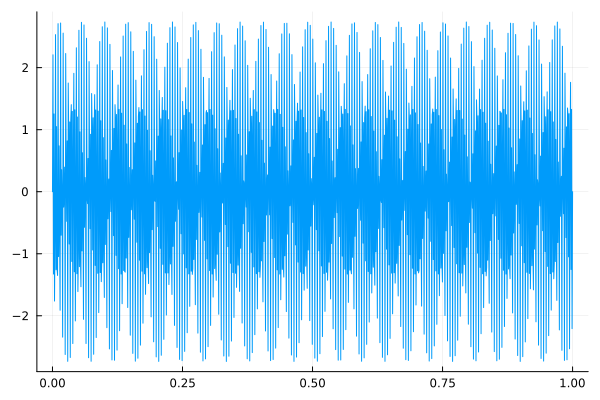

In [5]:
Fs = 1024;  
t = 0:1/(Fs-1):1; 

x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400)

plot(t, x, legend=false)

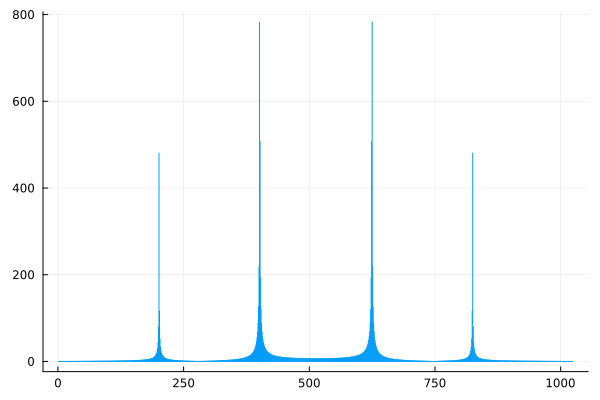

In [8]:
y = fft(x)
sticks(abs.(y), legend=false)

This bar graph represents the modulus of complex numbers obtained from a transform. The graph is symmetrical, allowing us to clearly identify high amplitude frequencies within the signal, as well as their symmetrical reflections.

### Task 2 - Noise removal

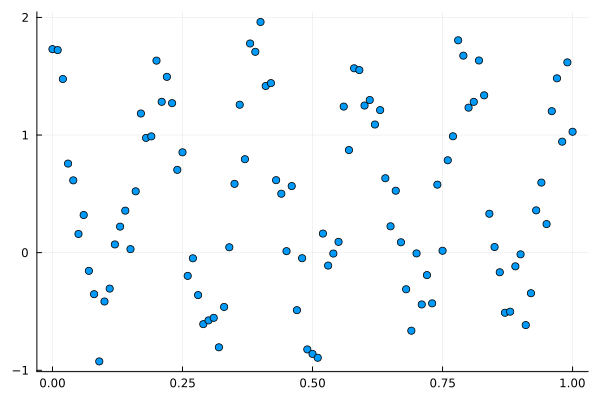

In [20]:
Fs = 101
t = 0:1/(Fs-1):1

x_noised = cos.(2*pi*t*5) .+ rand(length(t))
plot(t, x_noised, markershape=:circle, legend = false, seriestype=:scatter)

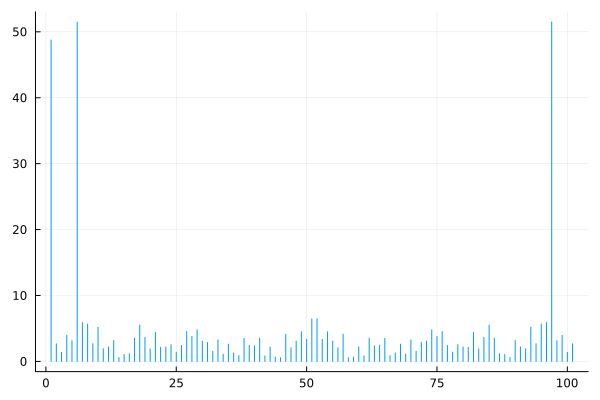

In [21]:
y = fft(x_noised)
sticks(abs.(y), legend=false)

In [22]:
for i in 1:length(y)
    if abs(y[i]) < 50 
        y[i] = 0
    end
end

y[abs.(y) .> 0];

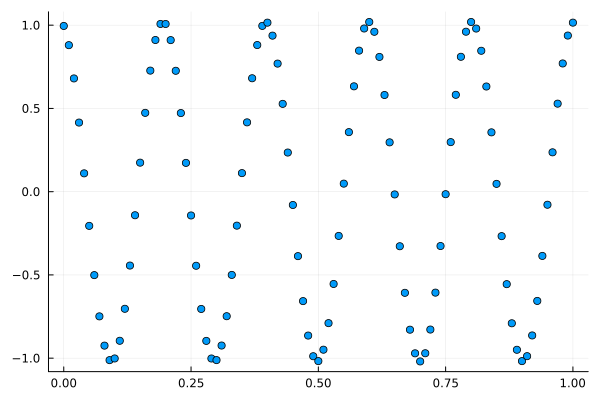

In [23]:
y_reversed = ifft(y)

plot(t2, [i.re for i in y_reversed], markershape=:circle, legend = false, seriestype=:scatter)     

### Task 3 - Voice recording

In [25]:
using WAV, PlotlyJS

In [198]:
snd, sampFreq = wavread("sample.wav")

([-3.0518509447574615e-5; -3.0518509447574615e-5; … ; -0.0008850367739796638; -0.0008850367739796638;;], 16000.0f0, 0x0020, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x28, 0x00, 0x00, 0x00, 0xfe, 0xff, 0x01, 0x00, 0x80, 0x3e  …  0x10, 0x00, 0x80, 0x00, 0x00, 0xaa, 0x00, 0x38, 0x9b, 0x71])])

In [199]:
wavplay(snd, sampFreq)

In [200]:
sampFreq = Int(sampFreq)

16000

##### Adding noise

In [201]:
s .+= (rand(length(s)) .-0.5) / 10;

In [202]:
wavplay(s, sampFreq)

In [203]:
wavwrite(s, "noised_sample.wav", Fs=sampFreq)

In [204]:
snd, sampFreq = wavread("noised_sample.wav")

([-2.0681347846984863; -2.0847885608673096; … ; -1.9637258052825928; -1.9266566038131714;;], 16000.0f0, 0x0020, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x28, 0x00, 0x00, 0x00, 0xfe, 0xff, 0x01, 0x00, 0x80, 0x3e  …  0x10, 0x00, 0x80, 0x00, 0x00, 0xaa, 0x00, 0x38, 0x9b, 0x71])])

┌ Warning: Skipped xaxis arg (zeroline = false, showline = true, mirror = :ticks)
└ @ Plots C:\Users\macie\.julia\packages\Plots\Pe7wF\src\axes.jl:76
┌ Warning: Skipped yaxis arg (zeroline = false, showline = true, mirror = :ticks)
└ @ Plots C:\Users\macie\.julia\packages\Plots\Pe7wF\src\axes.jl:76


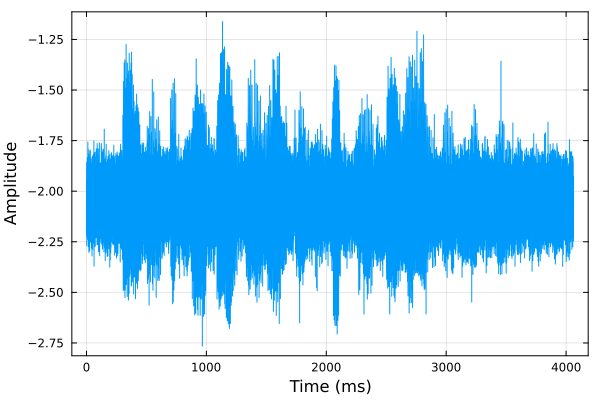

In [205]:
timeArray = (0:(size(snd)[1]-1)) / sampFreq
timeArray = timeArray * 1000

plot(timeArray, snd,
     xlabel="Time (ms)",
     ylabel="Amplitude",
     legend=false,
     framestyle=:box,
     xaxis=(zeroline=false, showline=true, mirror=:ticks),
     yaxis=(zeroline=false, showline=true, mirror=:ticks))

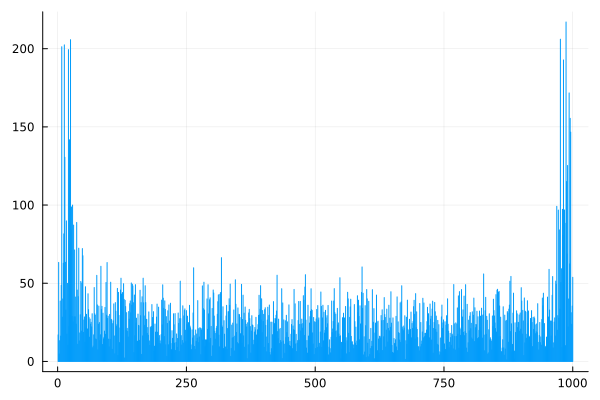

In [206]:
y = fft(snd)
sticks((abs.(y[2:65:length(y)])), legend = false)

##### Removing noise

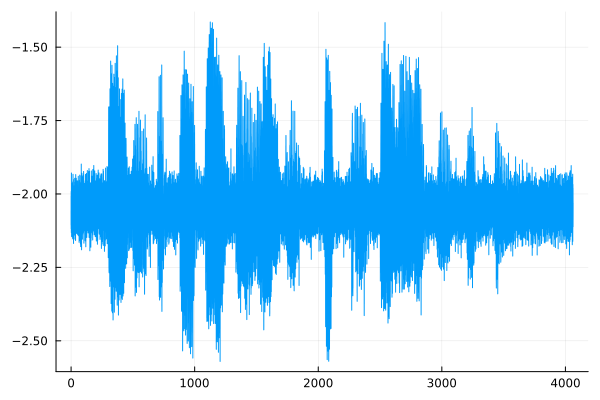

In [197]:
for i in 1:length(y)
    if abs(y[i]) < 20
        y[i] = 0
    end
end

y[abs.(y) .> 0];

y_reversed = ifft(y);
plot(timeArray, [i.re for i in y_reversed], legend = false)     

In [188]:
wavwrite([i.re for i in y_reversed], "removed_noise_sample.wav", Fs=sampFreq)

In [189]:
snd, sampFreq = wavread("removed_noise_sample.wav")

([-2.056790351867676; -2.0743913650512695; … ; -2.103654146194458; -2.028783082962036;;], 16000.0f0, 0x0020, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x28, 0x00, 0x00, 0x00, 0xfe, 0xff, 0x01, 0x00, 0x80, 0x3e  …  0x10, 0x00, 0x80, 0x00, 0x00, 0xaa, 0x00, 0x38, 0x9b, 0x71])])

In [190]:
wavplay(snd, sampFreq)